<a href="https://colab.research.google.com/github/muhammadalinoor-1982/Blog/blob/master/personalized_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive to Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Basic python library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read The Datasets

In [ ]:
variant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
565,565,SMAD3,E239A,4
1196,1196,PIK3CA,Q546E,7
1885,1885,MTOR,S2215F,7
1295,1295,HRAS,G12S,7
2118,2118,CCND1,D289del,7


In [ ]:
text_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


,ID,TEXT
3271,3271,Mutations of the RET receptor tyrosine kinase ...
410,410,Tumor suppressor p53-dependent apoptosis is th...
3283,3283,Several mutations were identi®ed in the kinase...
2310,2310,Activating mutations in JAK1 have been reporte...
2088,2088,Argonaute (Ago) 2 is the catalytic engine of m...


Cleanup Raw Text  

In [ ]:
import re
from wordcloud import STOPWORDS, WordCloud

In [ ]:
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

Preprocess text

In [ ]:
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16741/16741 [00:00<00:00, 841656.10it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16102/16102 [00:00<00:00, 919104.03it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6066/6066 [00:00<00:00, 822854.08it/s]
<ipython-i

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 1024664.54it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 10176/10176 [00:00<00:00, 555282.54it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5481/5481 [00:00<00:00, 809385.64it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 976709.43it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 28185/28185 [00:00<00:00, 949019.07it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 12999/12999 [00:00<00:00, 933639.70it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 565847.41it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5664/5664 [00:00<00:00, 703939.13it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 3608/3608 [00:00<00:00, 730359.50it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 825505.80it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 13245/13245 [00:00<00:00, 976285.20it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 748882.41it/s]
<ipython-inp

There is no text description for ID:  2755


100%|██████████| 7462/7462 [00:00<00:00, 751576.41it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 20861/20861 [00:00<00:00, 910871.19it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 24387/24387 [00:00<00:00, 1059162.41it/s]
<ipython-input-8-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
#merging both gene_variations and text data based on ID
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [ ]:
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [ ]:
df[df['ID']==1407]

,ID,Gene,Variation,Class,TEXT
1407,1407,FGFR3,K508M,6,FGFR3 K508M


In [ ]:
df.sample(5)

,ID,Gene,Variation,Class,TEXT
350,350,CDH1,Epigenetic Silencing,1,diffuse gastric carcinoma despite common e cad...
3047,3047,KIT,R796G,4,ras mitogen activated protein kinase mapk path...
2986,2986,KIT,V559C,2,purpose gastrointestinal stromal tumors gist c...
287,287,ARID2,Truncating Mutations,1,eukaryotic cells dna packaged chromatin compac...
3046,3046,KIT,Y570H,2,context melanomas arising acral mucosal chroni...


In [ ]:
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']

Define input and output/target features

In [ ]:
y = df['Class']
X = df['Gene_Variation_TEXT']

In [ ]:
X

0       FAM58A Truncating Mutations cyclin dependent k...
1       CBL W802* abstract background non small cell l...
2       CBL Q249E abstract background non small cell l...
3       CBL N454D recent evidence demonstrated acquire...
4       CBL L399V oncogenic mutations monomeric casita...
                              ...                        
3316    RUNX1 D171N introduction myelodysplastic syndr...
3317    RUNX1 A122* introduction myelodysplastic syndr...
3318    RUNX1 Fusions runt related transcription facto...
3319    RUNX1 R80C runx1 aml1 gene frequent target chr...
3320    RUNX1 K83E frequent mutations associated leuke...
Name: Gene_Variation_TEXT, Length: 3321, dtype: object

Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2656,), (665,), (2656,), (665,))

Apply Count Vectorizer to embed the words in n dimentional space of Vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))

Fit and Transform Count Vectorizer for Visualization

In [ ]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

Evaluating KNeighbors
**********************************************
Train Result:
Accuracy Score: 68.90%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.597194  0.656388  0.625393   454.000000
2              0.650155  0.589888  0.618557   356.000000
3              0.438596  0.357143  0.393701    70.000000
4              0.701954  0.787934  0.742463   547.000000
5              0.582418  0.552083  0.566845   192.000000
6              0.782609  0.626087  0.695652   230.000000
7              0.772251  0.777339  0.774787   759.000000
8              0.600000  0.333333  0.428571    18.000000
9              0.869565  0.666667  0.754717    30.000000
accuracy       0.689006  0.689006  0.689006     0.689006
macro avg      0.666083  0.594096  0.622298  2656.000000
weighted avg   0.689797  0.689006  0.687152  2656.000000
_______________________________________________
Confusion Matrix: 
[[298  15   2  

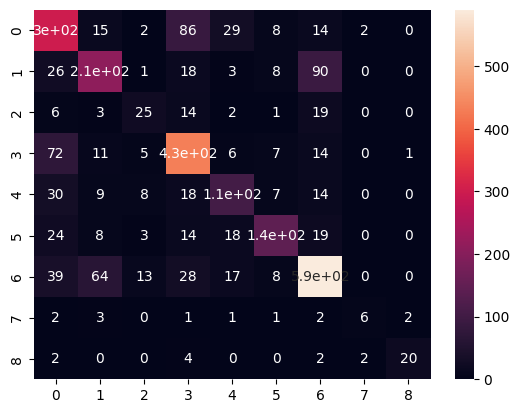

None
************************************************************************
Test Result:
Accuracy Score: 60.75%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.515385  0.587719  0.549180  114.000000
2              0.554217  0.479167  0.513966   96.000000
3              0.888889  0.421053  0.571429   19.000000
4              0.600000  0.669065  0.632653  139.000000
5              0.346154  0.360000  0.352941   50.000000
6              0.697674  0.666667  0.681818   45.000000
7              0.732620  0.706186  0.719160  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.714286  0.833333    7.000000
accuracy       0.607519  0.607519  0.607519    0.607519
macro avg      0.592771  0.511571  0.539387  665.000000
weighted avg   0.616660  0.607519  0.608154  665.000000
_______________________________________________
Confusion Matrix: 
[[ 67   3   0  30   

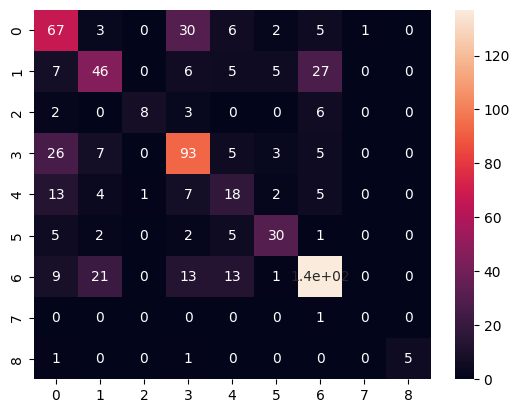

None
************************************************************************


Evaluating SupportVectorMachine
**********************************************
Train Result:
Accuracy Score: 70.41%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.682573  0.724670  0.702991   454.000000
2              0.868421  0.463483  0.604396   356.000000
3              1.000000  0.014286  0.028169    70.000000
4              0.762324  0.791590  0.776682   547.000000
5              0.588235  0.260417  0.361011   192.000000
6              0.895105  0.556522  0.686327   230.000000
7              0.637619  0.973650  0.770594   759.000000
8              1.000000  0.222222  0.363636    18.000000
9              0.875000  0.700000  0.777778    30.000000
accuracy       0.704066  0.704066  0.704066     0.704066
macro avg      0.812142  0.522982  0.563509  2656.000000
weighted avg   0.735337  0.704066  0.678866  2656

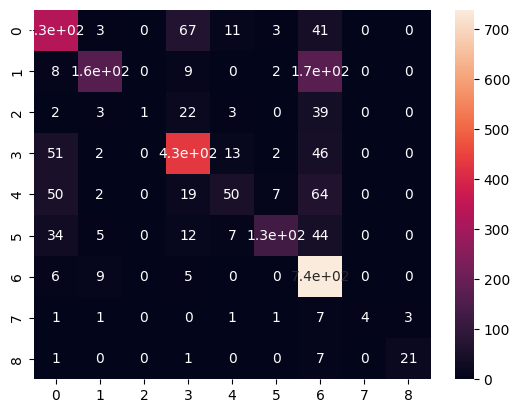

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 61.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.526316  0.614035  0.566802  114.000000
2              0.739130  0.354167  0.478873   96.000000
3              1.000000  0.105263  0.190476   19.000000
4              0.666667  0.604317  0.633962  139.000000
5              0.538462  0.140000  0.222222   50.000000
6              0.852941  0.644444  0.734177   45.000000
7              0.583062  0.922680  0.714571  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.615038  0.615038  0.615038    0.615038
macro avg      0.656286  0.439593  0.474262  665.000000
weighted avg   0.643673  0.615038  0.586758  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   1   0  23   2   0  18   0   0]
 [  2  34   0   0   0   2  58   0   0]
 [  2   0   2   4   

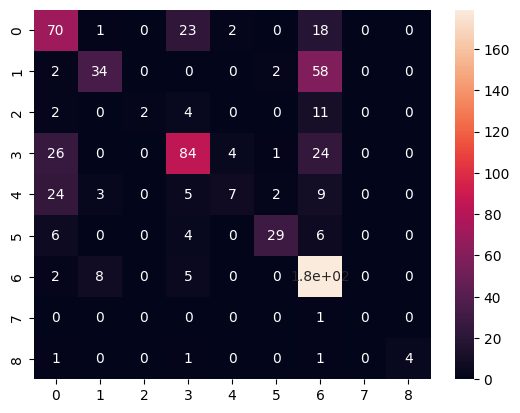

None
************************************************************************


Evaluating LogisticRegression
**********************************************
Train Result:
Accuracy Score: 85.39%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.866511  0.814978  0.839955   454.000000
2              0.871658  0.915730  0.893151   356.000000
3              0.453237  0.900000  0.602871    70.000000
4              0.931102  0.864717  0.896682   547.000000
5              0.559259  0.786458  0.653680   192.000000
6              0.845833  0.882609  0.863830   230.000000
7              0.984472  0.835310  0.903778   759.000000
8              0.857143  1.000000  0.923077    18.000000
9              0.909091  1.000000  0.952381    30.000000
accuracy       0.853916  0.853916  0.853916     0.853916
macro avg      0.808701  0.888867  0.836600  2656.000000
weighted avg   0.879737  0.853916  0.861193  2656.0

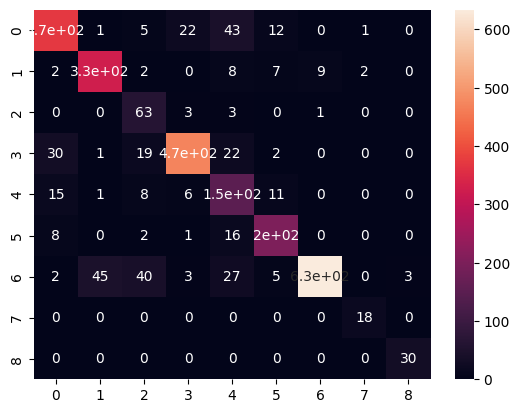

None
************************************************************************
Test Result:
Accuracy Score: 62.26%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.583333  0.614035  0.598291  114.000000
2              0.549451  0.520833  0.534759   96.000000
3              0.464286  0.684211  0.553191   19.000000
4              0.700000  0.654676  0.676580  139.000000
5              0.338710  0.420000  0.375000   50.000000
6              0.704545  0.688889  0.696629   45.000000
7              0.724324  0.690722  0.707124  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.622556  0.622556  0.622556    0.622556
macro avg      0.562739  0.538310  0.540983  665.000000
weighted avg   0.633876  0.622556  0.626269  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   5   1  19   

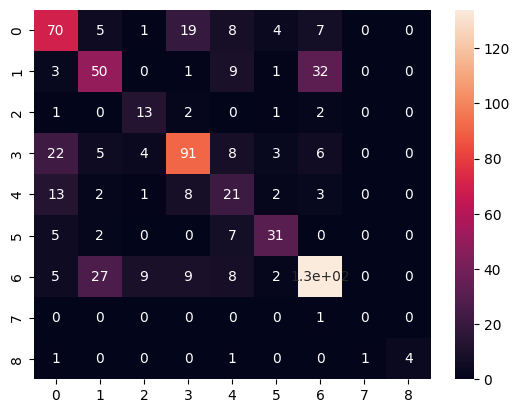

None
************************************************************************


Evaluating DecisionTree
**********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 54.52%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.364791  0.885463  0.516710   454.000000
2              0.631579  0.202247  0.306383   356.000000
3              0.000000  0.000000  0.000000    70.000000
4              0.908213  0.343693  0.498674   547.000000
5              0.833333  0.208333  0.333333   192.000000
6              0.959016  0.508696  0.664773   230.000000
7              0.591722  0.828722  0.690450   759.000000
8              0.000000  0.000000  0.000000    18.000000
9              0.000000  0.000000  0.000000    30.000000
accuracy       0.545181  0.545181  0.545181     0.545181
macro avg      0.476517  0.330795  0.334480  2656.000000
weighted avg   0.646438  0.545181  0.511063  2656.000000
_______________________________________________
Confusion Matrix: 
[[402   3   0   5   3   3  38   0   0]
 [109  72   0   0   0   1 174   0   0]
 [ 21 

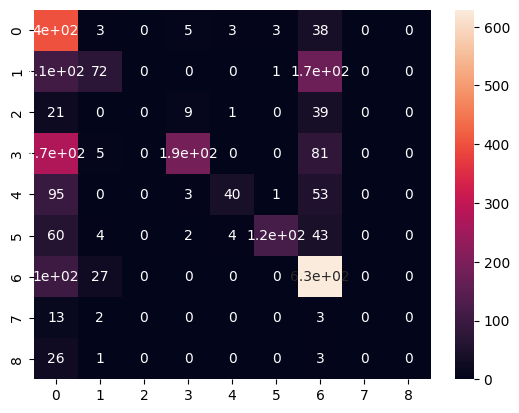

None
************************************************************************
Test Result:
Accuracy Score: 50.38%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.336996  0.807018  0.475452  114.000000
2              0.440000  0.114583  0.181818   96.000000
3              0.000000  0.000000  0.000000   19.000000
4              0.711538  0.266187  0.387435  139.000000
5              1.000000  0.140000  0.245614   50.000000
6              0.828571  0.644444  0.725000   45.000000
7              0.582418  0.819588  0.680942  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.000000  0.000000  0.000000    7.000000
accuracy       0.503759  0.503759  0.503759    0.503759
macro avg      0.433280  0.310202  0.299585  665.000000
weighted avg   0.571182  0.503759  0.454914  665.000000
_______________________________________________
Confusion Matrix: 
[[ 92   2   0   2   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Heatmap of Confusion Matrix: 
Axes(0.125,0.11;0.62x0.77)



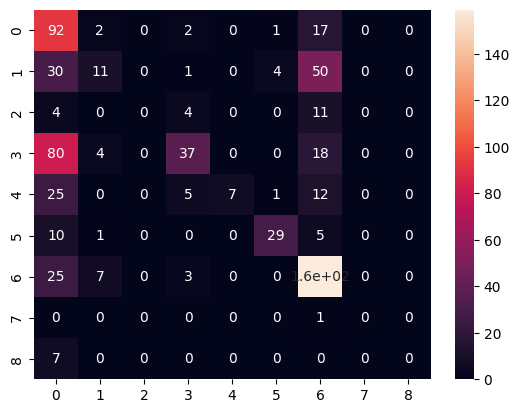

None
************************************************************************


Evaluating RandomForest
**********************************************
Train Result:
Accuracy Score: 81.48%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.724820  0.887665  0.798020   454.000000
2              0.980620  0.710674  0.824104   356.000000
3              0.785714  0.157143  0.261905    70.000000
4              0.853147  0.892139  0.872207   547.000000
5              0.810526  0.401042  0.536585   192.000000
6              0.964912  0.717391  0.822943   230.000000
7              0.769151  0.978920  0.861449   759.000000
8              1.000000  0.166667  0.285714    18.000000
9              1.000000  0.700000  0.823529    30.000000
accuracy       0.814759  0.814759  0.814759     0.814759
macro avg      0.876543  0.623516  0.676273  2656.000000
weighted avg   0.831768  0.814759  0.800867  2656.000000


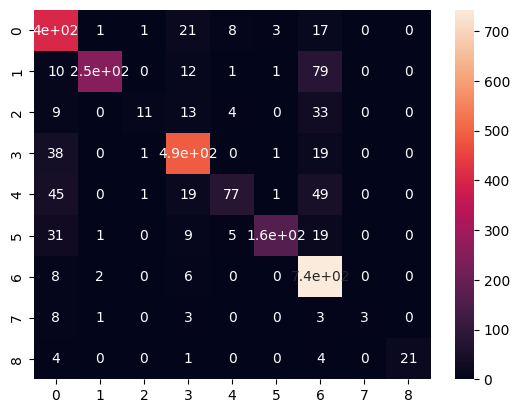

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 66.02%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score    support
1              0.525641  0.719298  0.607407  114.00000
2              0.866667  0.406250  0.553191   96.00000
3              1.000000  0.105263  0.190476   19.00000
4              0.726562  0.669065  0.696629  139.00000
5              0.473684  0.180000  0.260870   50.00000
6              0.857143  0.666667  0.750000   45.00000
7              0.653430  0.932990  0.768577  194.00000
8              0.000000  0.000000  0.000000    1.00000
9              1.000000  0.428571  0.600000    7.00000
accuracy       0.660150  0.660150  0.660150    0.66015
macro avg      0.678125  0.456456  0.491906  665.00000
weighted avg   0.690430  0.660150  0.635938  665.00000
_______________________________________________
Confusion Matrix: 
[[ 82   1   0  13   3   1  14   0   0]
 [  6  39   0   3   5   2  41   0   0]
 [  1   0   2   3   1   0  12   0

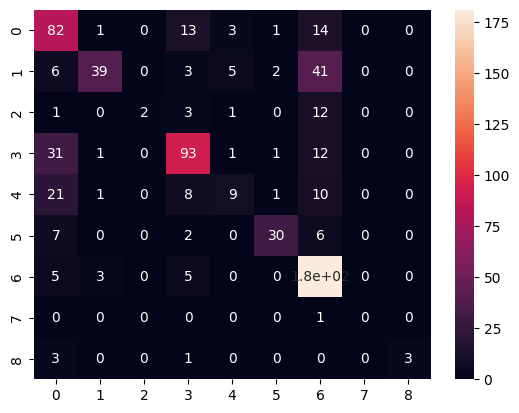

None
************************************************************************


Evaluating GradientBoostingClassifier
**********************************************
Train Result:
Accuracy Score: 84.11%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.800839  0.841410  0.820623   454.000000
2              0.913043  0.825843  0.867257   356.000000
3              0.538462  0.200000  0.291667    70.000000
4              0.816189  0.884826  0.849123   547.000000
5              0.741497  0.567708  0.643068   192.000000
6              0.910377  0.839130  0.873303   230.000000
7              0.854916  0.939394  0.895166   759.000000
8              1.000000  0.944444  0.971429    18.000000
9              1.000000  0.933333  0.965517    30.000000
accuracy       0.841114  0.841114  0.841114     0.841114
macro avg      0.841702  0.775121  0.797461  2656.000000
weighted avg   0.836373  0.841114  0.834490

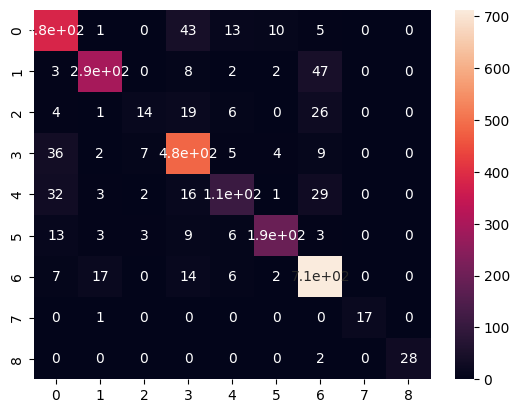

None
************************************************************************
Test Result:
Accuracy Score: 59.25%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.504274  0.517544  0.510823  114.000000
2              0.546667  0.427083  0.479532   96.000000
3              0.500000  0.157895  0.240000   19.000000
4              0.594595  0.633094  0.613240  139.000000
5              0.277778  0.200000  0.232558   50.000000
6              0.704545  0.688889  0.696629   45.000000
7              0.679654  0.809278  0.738824  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.833333  0.714286  0.769231    7.000000
accuracy       0.592481  0.592481  0.592481    0.592481
macro avg      0.515649  0.460896  0.475649  665.000000
weighted avg   0.579542  0.592481  0.580093  665.000000
_______________________________________________
Confusion Matrix: 
[[ 59   1   1  30   

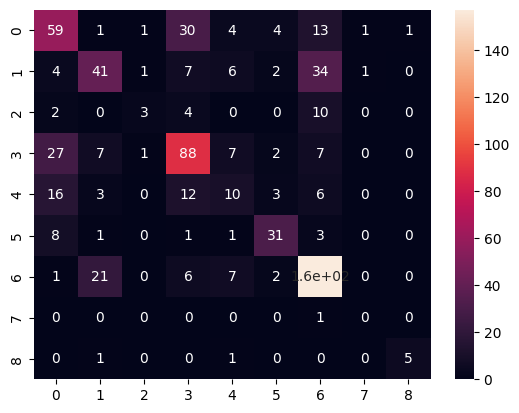

None
************************************************************************




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True)).transpose()
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_train, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_test, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

# List of models to evaluate
models = [
    ("KNeighbors", KNeighborsClassifier()),
    ("SupportVectorMachine", SVC()),
    ("LogisticRegression", LogisticRegression(penalty='l2', C=10, class_weight='balanced', random_state=42, solver='lbfgs', n_jobs=-1)),
    ("DecisionTree", DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0, max_features=None)),
    ("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0))
]

results = []

# Evaluate each model
for name, model in models:
    print(f"Evaluating {name}")
    print('**********************************************')
    model.fit(X_train, y_train)
    print_score(model, X_train, y_train, X_test, y_test, train=True)
    print_score(model, X_train, y_train, X_test, y_test, train=False)
    print("\n")